# COVID-19 Impact Analysis in Peru

- Name: Kevin Juan Román Rafaele
- LinkedIn: https://www.linkedin.com/in/kevin-juan-r-997530117/
- Email: mrredsky.2095@gmail.com
- GitHub: https://github.com/PoppinElo
- License: MIT License

## Motivation

The COVID-19 pandemic has had a profound impact globally, and understanding its effects at a regional level can help improve public health responses. This project aims to analyze the relationship between healthcare infrastructure (specifically health centers and posts) and the number of COVID-19 positive cases and deaths in Peru during 2020.

## Hypothesis

Our initial hypothesis is that regions with more health centers and health posts would have lower numbers of COVID-19 positive cases and deaths due to better healthcare accessibility.

## Data

We used three datasets for this analysis, sourced from the following:
1. **COVID-19 Datasets**: Downloaded from [Kaggle](https://www.kaggle.com/datasets/martinclark/peru-covid19-august-2020). The datasets include `fallecidos_covid.csv` and `positivos_covid.csv`.
2. **Health Centers and Posts**: Contains the number of health centers (`NUM_CENTROS_SALUD`) and health posts (`NUM_PUESTOS_SALUD`) per department.

### Data Curation

The datasets were curated manually before being loaded into the analysis notebook. This included standardizing the `DEPARTAMENTO` column by converting all values to uppercase and removing accents to ensure consistency across datasets.

## Steps in the Analysis

1. **Download and Extract Data**: Download the COVID-19 datasets from Kaggle and extract them into a folder called `datasets`.
2. **Load Data**: Load the extracted CSV files into pandas DataFrames.
3. **Data Cleaning**: Standardize the `DEPARTAMENTO` column across all datasets.
4. **Summarize Data**: Aggregate positive and deceased cases by department.
5. **Merge Data**: Combine the health centers/posts data with the summarized COVID-19 data.
6. **Correlation Analysis**: Calculate and visualize the correlation matrix.
7. **Scatter Plots**: Create scatter plots to visualize relationships between variables.
8. **Interpret Results**: Analyze and interpret the findings.

## Download and install missing libraries

unidecode library

In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.1 MB/s eta 0:00:00


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import os
from unidecode import unidecode

## Download the zip file containing de the Covid-19 cases dataset

In [ ]:
# Download the zip file from Kaggle
url = 'https://www.kaggle.com/datasets/martinclark/peru-covid19-august-2020/download?datasetVersionNumber=1'
response = requests.get(url)
zip_file_path = 'archive.zip'

## Save and extract the zip file

In [ ]:
# Save the zip file to the local directory
with open(zip_file_path, 'wb') as file:
    file.write(response.content)

# Extract the zip file
extraction_path = 'datasets'
os.makedirs(extraction_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

## Load data

In [ ]:
positivos_path = "/content/datasets/positivos_covid.csv"
fallecidos_path = "/content/datasets/fallecidos_covid.csv"

positivos_df = pd.read_csv(positivos_path, encoding='latin-1')
fallecidos_df = pd.read_csv(fallecidos_path, encoding='latin-1')

In [ ]:
positivos_df.head()

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,47.0,MASCULINO,20200615
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,PCR,15.0,FEMENINO,20200615
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,PCR,88.0,MASCULINO,20200615
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,PCR,73.0,MASCULINO,20200615
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,PCR,4.0,FEMENINO,20200615


In [ ]:
positivos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549321 entries, 0 to 549320
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UUID             549321 non-null  object 
 1   DEPARTAMENTO     549321 non-null  object 
 2   PROVINCIA        549321 non-null  object 
 3   DISTRITO         549321 non-null  object 
 4   METODODX         549321 non-null  object 
 5   EDAD             549247 non-null  float64
 6   SEXO             549321 non-null  object 
 7   FECHA_RESULTADO  549321 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 33.5+ MB


In [ ]:
fallecidos_df.head()

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,a3f91b4893446f471ec1c079f28ba20b,20200602,1,MASCULINO,20190205.0,LIMA,LIMA,LA VICTORIA
1,8960c1b9f3c9289271b41c4a7c0d33f6,20200602,41,MASCULINO,19780811.0,LIMA,LIMA,VILLA EL SALVADOR
2,36497739152c2ae26703c1eca9acf537,20200602,72,MASCULINO,19471001.0,ANCASH,SANTA,NUEVO CHIMBOTE
3,627171bd69f18c257468bca6cb0aeff0,20200602,49,MASCULINO,19700910.0,ANCASH,SANTA,CHIMBOTE
4,2b20dcb481a39590c87752156e2a9e32,20200602,26,MASCULINO,19931017.0,LIMA,LIMA,LOS OLIVOS


In [ ]:
fallecidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26658 entries, 0 to 26657
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UUID                 26658 non-null  object 
 1   FECHA_FALLECIMIENTO  26658 non-null  int64  
 2   EDAD_DECLARADA       26658 non-null  int64  
 3   SEXO                 26658 non-null  object 
 4   FECHA_NAC            25389 non-null  float64
 5   DEPARTAMENTO         26658 non-null  object 
 6   PROVINCIA            25379 non-null  object 
 7   DISTRITO             25909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ MB


## Data cleaning

In [ ]:
# Convert date columns to datetime with the correct format
positivos_df['FECHA_RESULTADO'] = pd.to_datetime(positivos_df['FECHA_RESULTADO'], format='%Y%m%d', errors='coerce')
fallecidos_df['FECHA_NAC'] = pd.to_datetime(fallecidos_df['FECHA_NAC'], format='%Y%m%d', errors='coerce')
fallecidos_df['FECHA_FALLECIMIENTO'] = pd.to_datetime(fallecidos_df['FECHA_FALLECIMIENTO'], format='%Y%m%d', errors='coerce')

# Drop missing values
positivos_df.dropna(inplace=True)
fallecidos_df.dropna(inplace=True)

In [ ]:
positivos_df['DEPARTAMENTO'] = positivos_df['DEPARTAMENTO'].replace('LIMA REGION', 'LIMA')

In [ ]:
positivos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549247 entries, 0 to 549320
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   UUID             549247 non-null  object        
 1   DEPARTAMENTO     549247 non-null  object        
 2   PROVINCIA        549247 non-null  object        
 3   DISTRITO         549247 non-null  object        
 4   METODODX         549247 non-null  object        
 5   EDAD             549247 non-null  float64       
 6   SEXO             549247 non-null  object        
 7   FECHA_RESULTADO  549247 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 37.7+ MB


In [ ]:
fallecidos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24657 entries, 0 to 26657
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   UUID                 24657 non-null  object        
 1   FECHA_FALLECIMIENTO  24657 non-null  datetime64[ns]
 2   EDAD_DECLARADA       24657 non-null  int64         
 3   SEXO                 24657 non-null  object        
 4   FECHA_NAC            24657 non-null  datetime64[ns]
 5   DEPARTAMENTO         24657 non-null  object        
 6   PROVINCIA            24657 non-null  object        
 7   DISTRITO             24657 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 1.7+ MB


## Data visualization

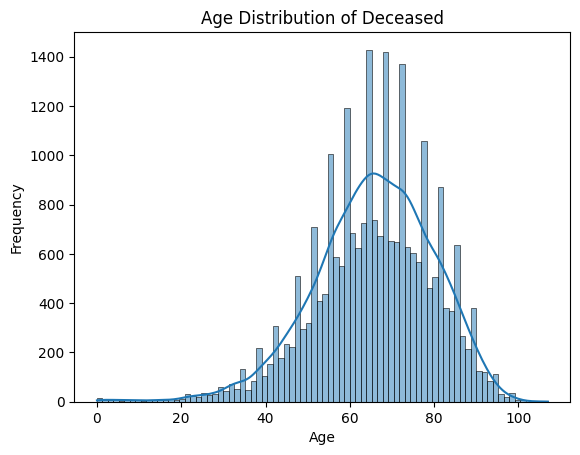

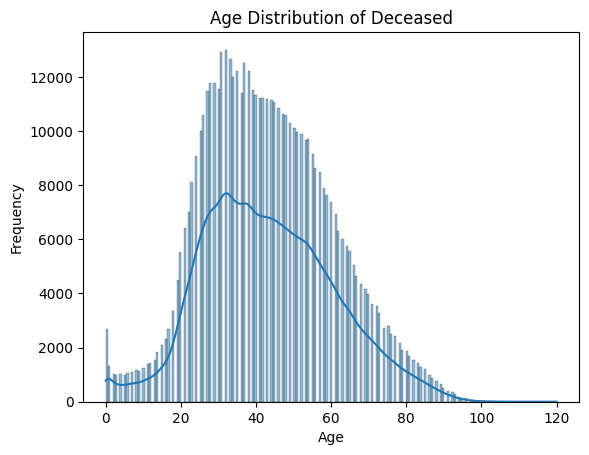

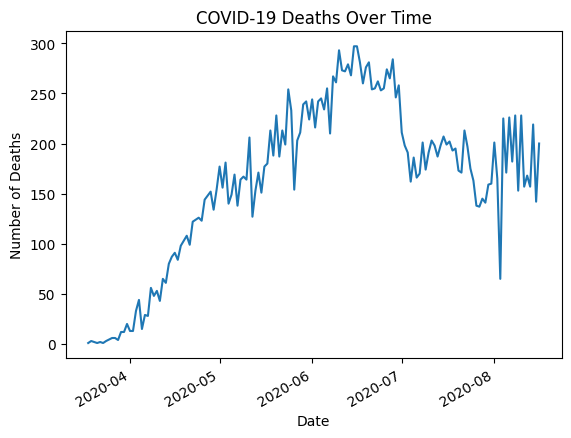

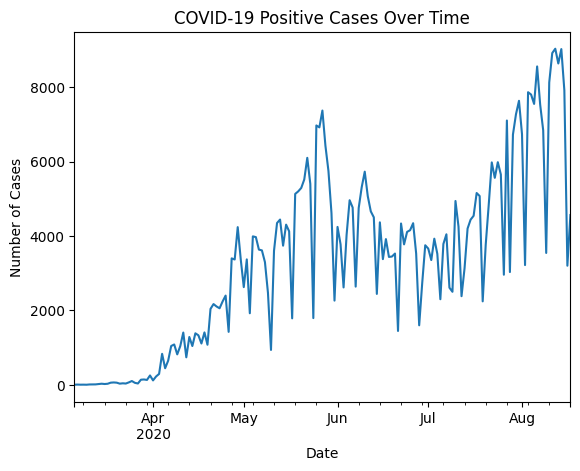

In [ ]:
# Example: Age distribution of deceased
sns.histplot(fallecidos_df['EDAD_DECLARADA'], kde=True)
plt.title('Age Distribution of Deceased')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Age distribution of positives cases
sns.histplot(positivos_df['EDAD'], kde=True)
plt.title('Age Distribution of Deceased')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Number of covid deaths over time
fallecidos_df['FECHA_FALLECIMIENTO'].value_counts().sort_index().plot(kind='line')
plt.title('COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

# Example: Number of positive cases over time
positivos_df['FECHA_RESULTADO'].value_counts().sort_index().plot(kind='line')
plt.title('COVID-19 Positive Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

## Comparative analyisis

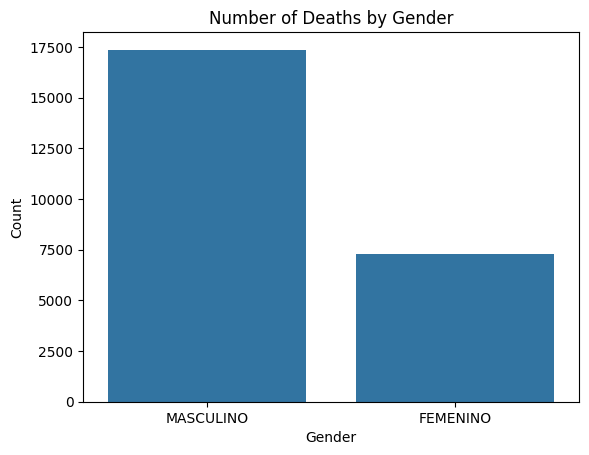

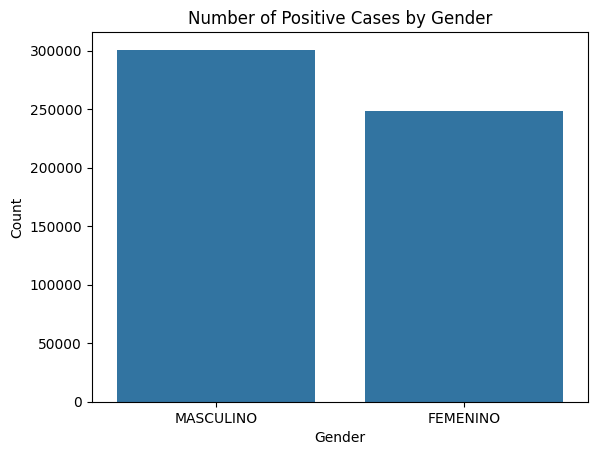

In [ ]:
# Example: Deaths by gender
sns.countplot(data=fallecidos_df, x='SEXO')
plt.title('Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Example: Positive cases by gender
sns.countplot(data=positivos_df, x='SEXO')
plt.title('Number of Positive Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Geographical Analysis

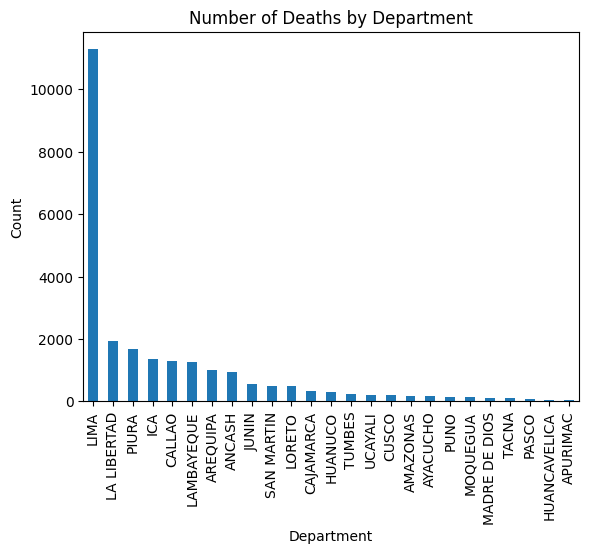

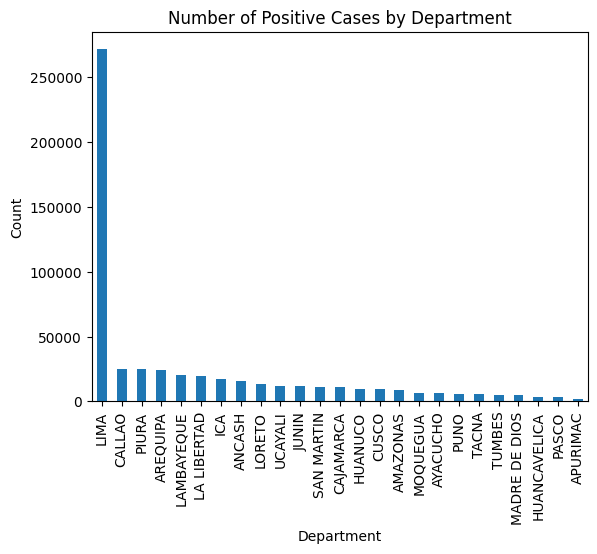

In [ ]:
# Example: Deaths by department
fallecidos_df['DEPARTAMENTO'].value_counts().plot(kind='bar')
plt.title('Number of Deaths by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# Example: Positive cases by department
positivos_df['DEPARTAMENTO'].value_counts().plot(kind='bar')
plt.title('Number of Positive Cases by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

## Time Series Analysis

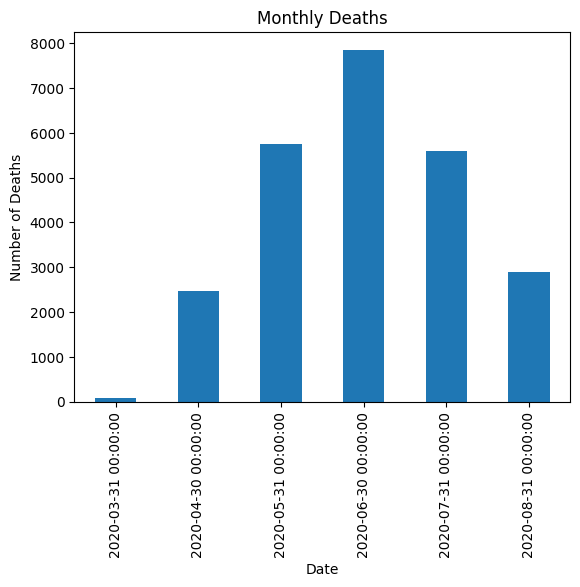

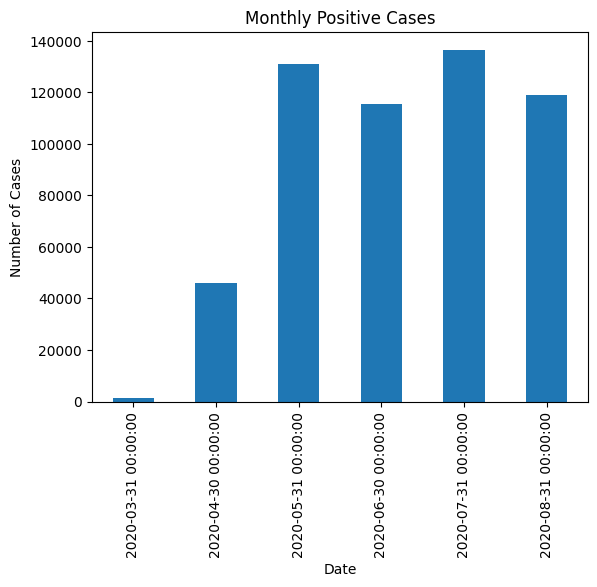

In [ ]:
fallecidos_df['FECHA_FALLECIMIENTO'].value_counts().resample('M').sum().plot(kind='bar')
plt.title('Monthly Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

positivos_df['FECHA_RESULTADO'].value_counts().resample('M').sum().plot(kind='bar')
plt.title('Monthly Positive Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

## Load the INEI health centers/posts datasets

In [ ]:
cs1_path = "/content/datasets/inei_cs_1.csv"
cs2_path = "/content/datasets/inei_cs_2.csv"

cs1_df = pd.read_csv(cs1_path)
cs2_df = pd.read_csv(cs2_path)

In [ ]:
cs1_df.head()

,DEPARTAMENTO,AÑO,NUM_HOSPITALES,NUM_TOTAL_SECTOR
0,Amazonas,2018,8,532
1,Áncash,2018,23,554
2,Apurímac,2018,8,485
3,Arequipa,2018,24,913
4,Ayacucho,2018,11,426


In [ ]:
cs1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DEPARTAMENTO      135 non-null    object
 1   AÑO               135 non-null    int64 
 2   NUM_HOSPITALES    134 non-null    object
 3   NUM_TOTAL_SECTOR  134 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


In [ ]:
cs2_df.head()

,DEPARTAMENTO,AÑO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD
0,Amazonas,2018,88,404
1,Áncash,2018,100,395
2,Apurímac,2018,75,354
3,Arequipa,2018,95,336
4,Ayacucho,2018,70,340


In [ ]:
cs2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DEPARTAMENTO       135 non-null    object
 1   AÑO                135 non-null    int64 
 2   NUM_CENTROS_SALUD  134 non-null    object
 3   NUM_PUESTOS_SALUD  134 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


## Data cleaning of cs2

In [ ]:
# we will focusing only in cs2 containing the health centers and posts data
cs2_df['NUM_CENTROS_SALUD'] = cs2_df['NUM_CENTROS_SALUD'].replace('-',np.nan).astype(float).astype('Int64')
cs2_df['NUM_PUESTOS_SALUD'] = cs2_df['NUM_PUESTOS_SALUD'].replace('-',np.nan).astype(float).astype('Int64')

In [ ]:
cs2_df[cs2_df['DEPARTAMENTO']=='Lima']

,DEPARTAMENTO,AÑO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD
14,Lima,2018,407,1192
41,Lima,2019,416,1347
68,Lima,2020,<NA>,<NA>
95,Lima,2021,461,1451
122,Lima,2022,<NA>,<NA>


In [ ]:
cs2_df.loc[cs2_df['DEPARTAMENTO'] == 'Lima', 'NUM_CENTROS_SALUD'] = \
    cs2_df.loc[cs2_df['DEPARTAMENTO'] == 'Lima Metropolitana', 'NUM_CENTROS_SALUD'].values + \
    cs2_df.loc[cs2_df['DEPARTAMENTO'] == 'Lima Región', 'NUM_CENTROS_SALUD'].values

cs2_df.loc[cs2_df['DEPARTAMENTO'] == 'Lima', 'NUM_PUESTOS_SALUD'] = \
    cs2_df.loc[cs2_df['DEPARTAMENTO'] == 'Lima Metropolitana', 'NUM_PUESTOS_SALUD'].values + \
    cs2_df.loc[cs2_df['DEPARTAMENTO'] == 'Lima Región', 'NUM_PUESTOS_SALUD'].values

In [ ]:
cs2_df[cs2_df['DEPARTAMENTO']=='Lima']

,DEPARTAMENTO,AÑO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD
14,Lima,2018,407,1192
41,Lima,2019,416,1347
68,Lima,2020,434,1434
95,Lima,2021,461,1451
122,Lima,2022,478,1454


In [ ]:
# Drop the Lima Metropolitana and Lima Region rows
cs2_df = cs2_df[cs2_df['DEPARTAMENTO'] != 'Lima Metropolitana']
cs2_df = cs2_df[cs2_df['DEPARTAMENTO'] != 'Lima Región']

In [ ]:
cs2_df.head(25)

,DEPARTAMENTO,AÑO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD
0,Amazonas,2018,88,404
1,Áncash,2018,100,395
2,Apurímac,2018,75,354
3,Arequipa,2018,95,336
4,Ayacucho,2018,70,340
5,Cajamarca,2018,174,773
6,Prov. Const. del Callao,2018,20,145
7,Cusco,2018,154,283
8,Huancavelica,2018,72,368
9,Huánuco,2018,74,273


In [ ]:
cs2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 134
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DEPARTAMENTO       125 non-null    object
 1   AÑO                125 non-null    int64 
 2   NUM_CENTROS_SALUD  125 non-null    Int64 
 3   NUM_PUESTOS_SALUD  125 non-null    Int64 
dtypes: Int64(2), int64(1), object(1)
memory usage: 5.1+ KB


In [ ]:
# Convert date columns to datetime with the correct format
cs2_df['AÑO'] = cs2_df['AÑO'].astype(int)
#cs2_df['AÑO'] = pd.to_datetime(cs2_df['AÑO'], format='%Y')

In [ ]:
cs2_df.head()

,DEPARTAMENTO,AÑO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD
0,Amazonas,2018,88,404
1,Áncash,2018,100,395
2,Apurímac,2018,75,354
3,Arequipa,2018,95,336
4,Ayacucho,2018,70,340


In [ ]:
# Drop missing values
cs2_df.dropna(inplace=True)

In [ ]:
cs2_df.head()

,DEPARTAMENTO,AÑO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD
0,Amazonas,2018,88,404
1,Áncash,2018,100,395
2,Apurímac,2018,75,354
3,Arequipa,2018,95,336
4,Ayacucho,2018,70,340


In [ ]:
positivos_df.head()

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,47.0,MASCULINO,2020-06-15
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,PCR,15.0,FEMENINO,2020-06-15
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,PCR,88.0,MASCULINO,2020-06-15
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,PCR,73.0,MASCULINO,2020-06-15
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,PCR,4.0,FEMENINO,2020-06-15


In [ ]:
fallecidos_df.head()

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,a3f91b4893446f471ec1c079f28ba20b,2020-06-02,1,MASCULINO,2019-02-05,LIMA,LIMA,LA VICTORIA
1,8960c1b9f3c9289271b41c4a7c0d33f6,2020-06-02,41,MASCULINO,1978-08-11,LIMA,LIMA,VILLA EL SALVADOR
2,36497739152c2ae26703c1eca9acf537,2020-06-02,72,MASCULINO,1947-10-01,ANCASH,SANTA,NUEVO CHIMBOTE
3,627171bd69f18c257468bca6cb0aeff0,2020-06-02,49,MASCULINO,1970-09-10,ANCASH,SANTA,CHIMBOTE
4,2b20dcb481a39590c87752156e2a9e32,2020-06-02,26,MASCULINO,1993-10-17,LIMA,LIMA,LOS OLIVOS


In [ ]:
cs2_df.loc[cs2_df['AÑO']==2020]

,DEPARTAMENTO,AÑO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD
54,Amazonas,2020,95,416
55,Áncash,2020,108,402
56,Apurímac,2020,80,364
57,Arequipa,2020,99,360
58,Ayacucho,2020,85,363
59,Cajamarca,2020,184,793
60,Prov. Const. del Callao,2020,19,152
61,Cusco,2020,189,294
62,Huancavelica,2020,76,367
63,Huánuco,2020,75,294


In [ ]:
cs2_df.loc[cs2_df['AÑO']==2020].shape

(25, 4)

## Aggregate covid cases by department

In [ ]:
# Aggregate positive cases by DEPARTAMENTO
positivos_agg_total = positivos_df.groupby('DEPARTAMENTO').size().reset_index(name='total_positive_cases')

# Aggregate deceased cases by DEPARTAMENTO
fallecidos_agg_total = fallecidos_df.groupby('DEPARTAMENTO').size().reset_index(name='total_deceased_cases')

In [ ]:
positivos_agg_total.shape

(25, 2)

In [ ]:
positivos_agg_total

,DEPARTAMENTO,total_positive_cases
0,AMAZONAS,8549
1,ANCASH,15665
2,APURIMAC,1875
3,AREQUIPA,24547
4,AYACUCHO,6238
5,CAJAMARCA,11281
6,CALLAO,24946
7,CUSCO,9328
8,HUANCAVELICA,3424
9,HUANUCO,9746


In [ ]:
fallecidos_agg_total.shape

(25, 2)

In [ ]:
fallecidos_agg_total

,DEPARTAMENTO,total_deceased_cases
0,AMAZONAS,177
1,ANCASH,948
2,APURIMAC,55
3,AREQUIPA,996
4,AYACUCHO,171
5,CAJAMARCA,351
6,CALLAO,1282
7,CUSCO,207
8,HUANCAVELICA,61
9,HUANUCO,295


# Standardize the cs2 and aggregate Covid numbes datasets prior to merging

In [ ]:
# Standardize the case of the DEPARTAMENTO column
cs2_df['DEPARTAMENTO'] = cs2_df['DEPARTAMENTO'].str.upper()
positivos_agg_total['DEPARTAMENTO'] = positivos_agg_total['DEPARTAMENTO'].str.upper()
fallecidos_agg_total['DEPARTAMENTO'] = fallecidos_agg_total['DEPARTAMENTO'].str.upper()

# Standardize the case and remove accents from the DEPARTAMENTO column
cs2_df['DEPARTAMENTO'] = cs2_df['DEPARTAMENTO'].apply(lambda x: unidecode(str(x)).upper())
positivos_agg_total['DEPARTAMENTO'] = positivos_agg_total['DEPARTAMENTO'].apply(lambda x: unidecode(str(x)).upper())
fallecidos_agg_total['DEPARTAMENTO'] = fallecidos_agg_total['DEPARTAMENTO'].apply(lambda x: unidecode(str(x)).upper())

cs2_df['DEPARTAMENTO'] = cs2_df['DEPARTAMENTO'].replace('PROV. CONST. DEL CALLAO', 'CALLAO')

## Extracting the information from the health centers and posts counted in 2020

In [ ]:
cs2_2020_df = cs2_df.loc[cs2_df['AÑO']==2020]
cs2_2020_df = cs2_2020_df.drop(columns=['AÑO'])

In [ ]:
cs2_2020_df

,DEPARTAMENTO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD
54,AMAZONAS,95,416
55,ANCASH,108,402
56,APURIMAC,80,364
57,AREQUIPA,99,360
58,AYACUCHO,85,363
59,CAJAMARCA,184,793
60,CALLAO,19,152
61,CUSCO,189,294
62,HUANCAVELICA,76,367
63,HUANUCO,75,294


In [ ]:
cs2_2020_df.shape

(25, 3)

In [ ]:
positivos_agg_total.shape

(25, 2)

In [ ]:
fallecidos_agg_total.shape

(25, 2)

## Merge the DataFrames on DEPARTAMENTO

In [1]:
merged_df = pd.merge(cs2_2020_df, positivos_agg_total, on='DEPARTAMENTO', how='inner')
merged_df = pd.merge(merged_df, fallecidos_agg_total, on='DEPARTAMENTO', how='inner')

NameError: name 'pd' is not defined

In [ ]:
merged_df.shape

(25, 5)

In [ ]:
merged_df

,DEPARTAMENTO,NUM_CENTROS_SALUD,NUM_PUESTOS_SALUD,total_positive_cases,total_deceased_cases
0,AMAZONAS,95,416,8549,177
1,ANCASH,108,402,15665,948
2,APURIMAC,80,364,1875,55
3,AREQUIPA,99,360,24547,996
4,AYACUCHO,85,363,6238,171
5,CAJAMARCA,184,793,11281,351
6,CALLAO,19,152,24946,1282
7,CUSCO,189,294,9328,207
8,HUANCAVELICA,76,367,3424,61
9,HUANUCO,75,294,9746,295


## Analysis and visualization of correlations

**With Lima department**

                      NUM_CENTROS_SALUD  NUM_PUESTOS_SALUD  \
NUM_CENTROS_SALUD              1.000000           0.915802   
NUM_PUESTOS_SALUD              0.915802           1.000000   
total_positive_cases           0.794744           0.810277   
total_deceased_cases           0.796179           0.789518   

                      total_positive_cases  total_deceased_cases  
NUM_CENTROS_SALUD                 0.794744              0.796179  
NUM_PUESTOS_SALUD                 0.810277              0.789518  
total_positive_cases              1.000000              0.989075  
total_deceased_cases              0.989075              1.000000  


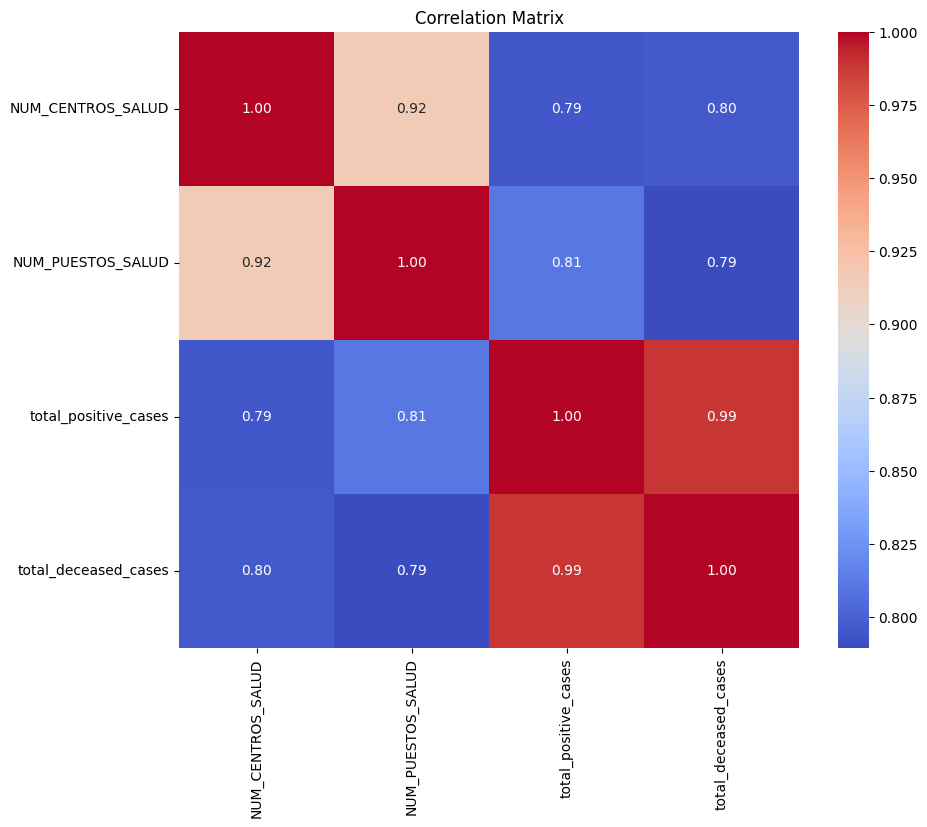

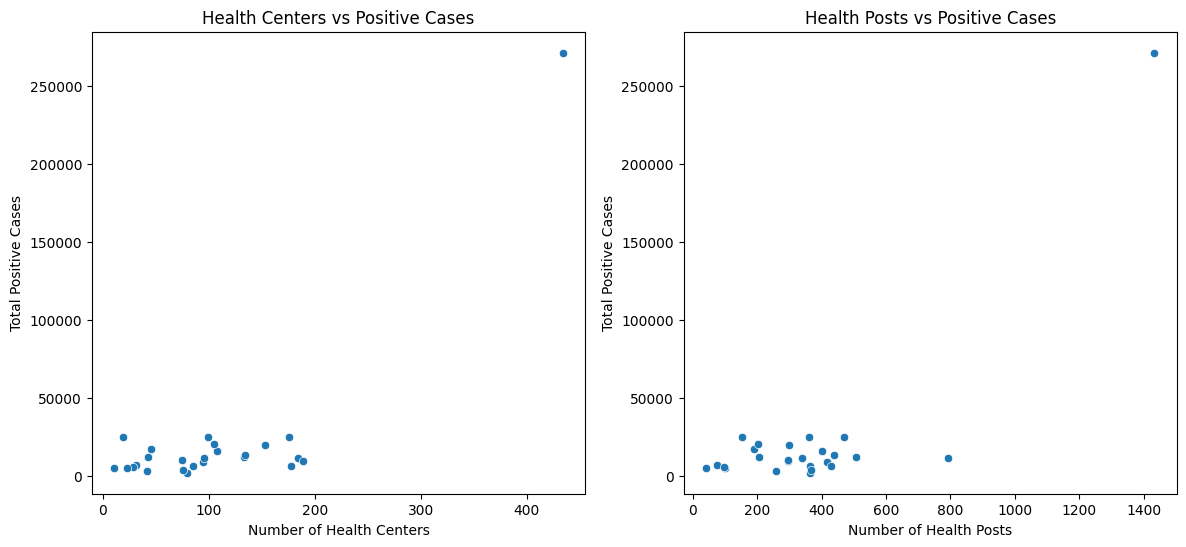

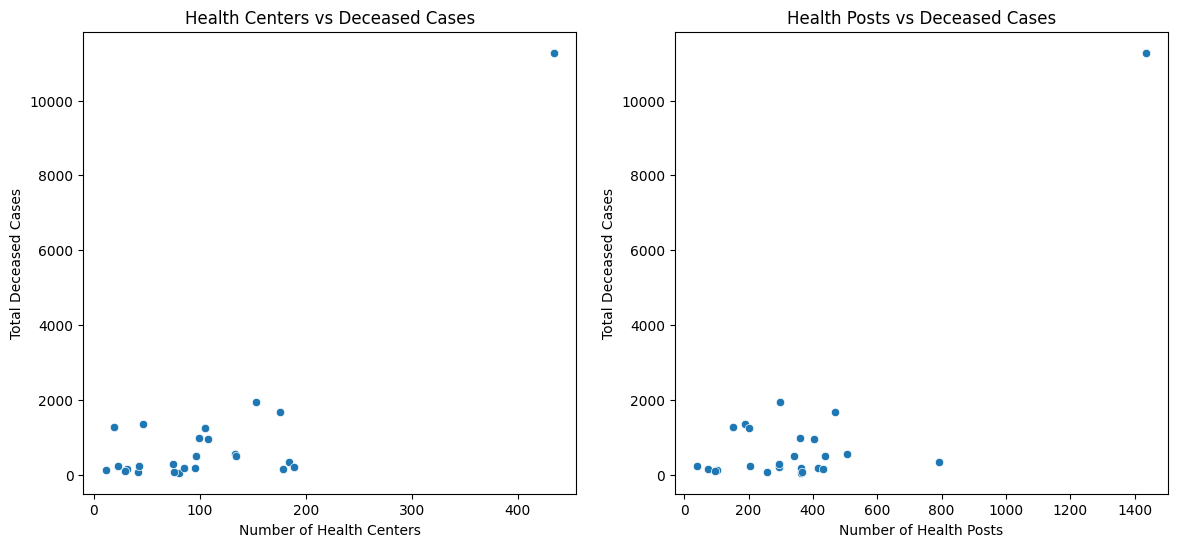

In [ ]:
# Calculate correlation matrix
correlation_matrix = merged_df[['NUM_CENTROS_SALUD', 'NUM_PUESTOS_SALUD', 'total_positive_cases', 'total_deceased_cases']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw a heatmap with the numeric values in each cell
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Display the heatmap
plt.title('Correlation Matrix')
plt.show()

# Scatter plots to visualize relationships
plt.figure(figsize=(14, 6))

# Relationship between health centers and positive cases
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df, x='NUM_CENTROS_SALUD', y='total_positive_cases')
plt.title('Health Centers vs Positive Cases')
plt.xlabel('Number of Health Centers')
plt.ylabel('Total Positive Cases')

# Relationship between health posts and positive cases
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_df, x='NUM_PUESTOS_SALUD', y='total_positive_cases')
plt.title('Health Posts vs Positive Cases')
plt.xlabel('Number of Health Posts')
plt.ylabel('Total Positive Cases')

plt.show()

plt.figure(figsize=(14, 6))

# Relationship between health centers and deceased cases
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df, x='NUM_CENTROS_SALUD', y='total_deceased_cases')
plt.title('Health Centers vs Deceased Cases')
plt.xlabel('Number of Health Centers')
plt.ylabel('Total Deceased Cases')

# Relationship between health posts and deceased cases
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_df, x='NUM_PUESTOS_SALUD', y='total_deceased_cases')
plt.title('Health Posts vs Deceased Cases')
plt.xlabel('Number of Health Posts')
plt.ylabel('Total Deceased Cases')

plt.show()


*With Lima department*

                      NUM_CENTROS_SALUD  NUM_PUESTOS_SALUD  \
NUM_CENTROS_SALUD              1.000000           0.774237   
NUM_PUESTOS_SALUD              0.774237           1.000000   
total_positive_cases           0.257095           0.117758   
total_deceased_cases           0.260035           0.047947   

                      total_positive_cases  total_deceased_cases  
NUM_CENTROS_SALUD                 0.257095              0.260035  
NUM_PUESTOS_SALUD                 0.117758              0.047947  
total_positive_cases              1.000000              0.888684  
total_deceased_cases              0.888684              1.000000  


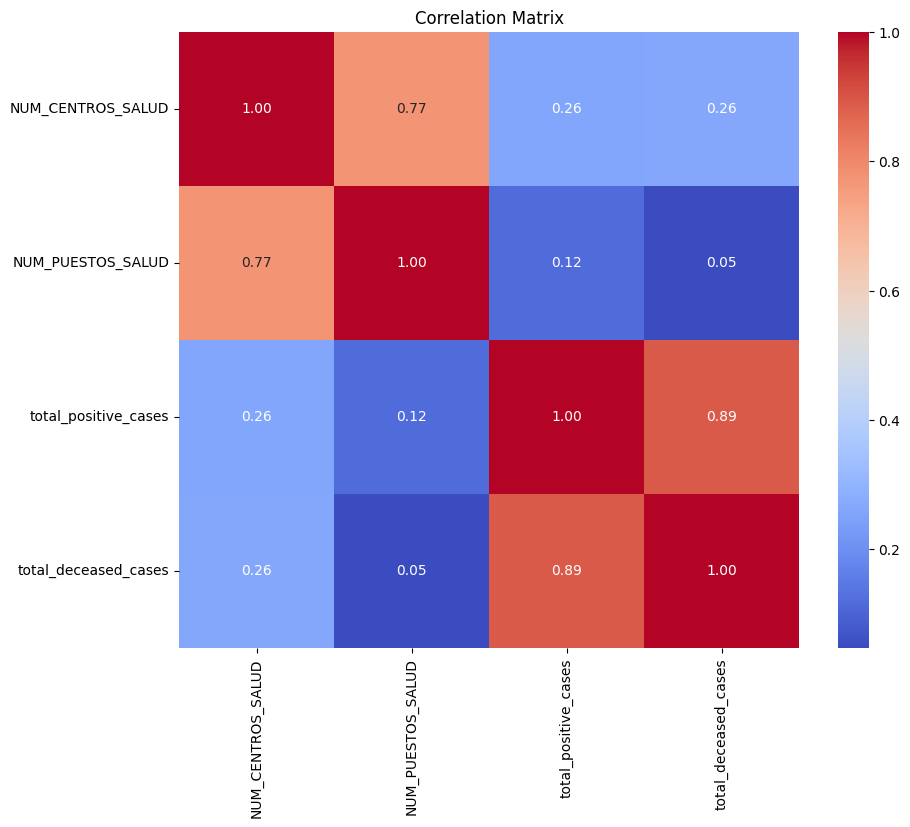

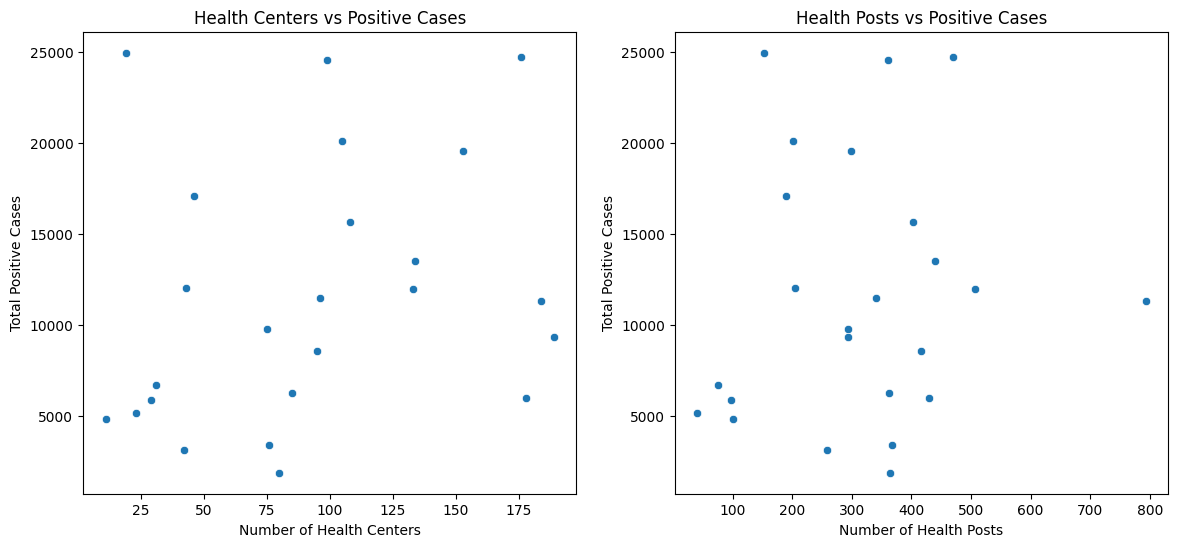

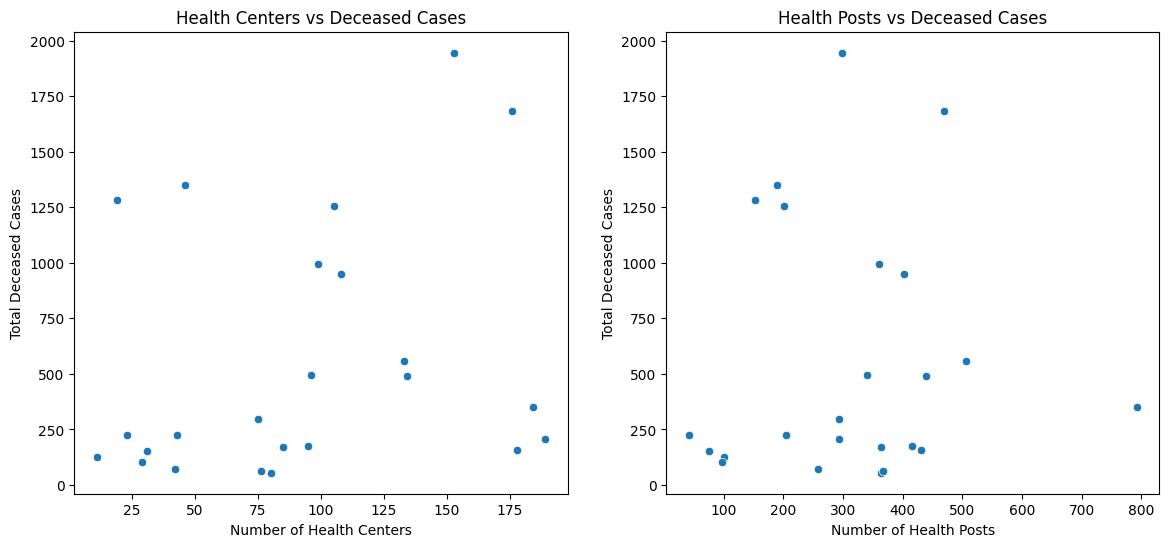

In [ ]:
# Calculate correlation matrix
new_merged_df = merged_df[merged_df['DEPARTAMENTO'] != 'LIMA']
correlation_matrix = new_merged_df[['NUM_CENTROS_SALUD', 'NUM_PUESTOS_SALUD', 'total_positive_cases', 'total_deceased_cases']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw a heatmap with the numeric values in each cell
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Display the heatmap
plt.title('Correlation Matrix')
plt.show()

# Scatter plots to visualize relationships
plt.figure(figsize=(14, 6))

# Relationship between health centers and positive cases
plt.subplot(1, 2, 1)
sns.scatterplot(data=new_merged_df, x='NUM_CENTROS_SALUD', y='total_positive_cases')
plt.title('Health Centers vs Positive Cases (without Lima)')
plt.xlabel('Number of Health Centers')
plt.ylabel('Total Positive Cases')

# Relationship between health posts and positive cases
plt.subplot(1, 2, 2)
sns.scatterplot(data=new_merged_df, x='NUM_PUESTOS_SALUD', y='total_positive_cases')
plt.title('Health Posts vs Positive Cases (without Lima)')
plt.xlabel('Number of Health Posts')
plt.ylabel('Total Positive Cases')

plt.show()

plt.figure(figsize=(14, 6))

# Relationship between health centers and deceased cases
plt.subplot(1, 2, 1)
sns.scatterplot(data=new_merged_df, x='NUM_CENTROS_SALUD', y='total_deceased_cases')
plt.title('Health Centers vs Deceased Cases (without Lima)')
plt.xlabel('Number of Health Centers')
plt.ylabel('Total Deceased Cases')

# Relationship between health posts and deceased cases
plt.subplot(1, 2, 2)
sns.scatterplot(data=new_merged_df, x='NUM_PUESTOS_SALUD', y='total_deceased_cases')
plt.title('Health Posts vs Deceased Cases (without Lima)')
plt.xlabel('Number of Health Posts')
plt.ylabel('Total Deceased Cases')

plt.show()
